In [12]:
import os
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


# Exercise: Air quality EPF

As seen in class, neglecting data cleaning may lead to biased and even completely wrong analysis. In this activity, you will be working with a dataset collected at EPF by a device assembled during a student project. Their device includes a number of sensors collecting information on air quality at the campus. You can visualize the data collected at this page:

[Station qualité de l'air EPF](http://station-qualite.000webhostapp.com/visualisation.html)


A student inexperienced in data analysis wanted to do a correlation analysis between the different elements. He downloaded the csv file and directly computed correlations between all time series.


In [13]:
data_fname = 'donnee_Station_Meteo.csv'
if not os.path.exists(data_fname):
    # Uncomment bellow if needed
    # !pip install wget
    import wget
    wget.download('http://station-qualite.000webhostapp.com/export.php?', data_fname)

In [14]:
data = pd.read_csv(data_fname, sep=';')

<AxesSubplot:>

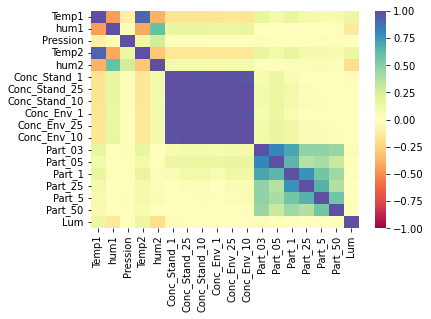

In [15]:
# Correlation matrix
corr = data.drop(columns=['id']).corr()
sns.heatmap(corr, cmap='Spectral', center=0, vmax=1., vmin=-1.)

Our inexperienced student thinks all is fine and takes these results as solid evidence-based truth. 

However, some of these correlations (or lack thereof) are rather surprising. In particular, pay attention to the atmospheric pression. According to this analysis, it does not present  correlations with any other variables, including temperature and humidity (`Temp2` and `hum2` are the only ones displaying a weak correlation). 

In [16]:
corr.Pression

Temp1           -0.094388
hum1             0.051350
Pression         1.000000
Temp2            0.133911
hum2             0.263297
Conc_Stand_1     0.028742
Conc_Stand_25    0.026628
Conc_Stand_10    0.026882
Conc_Env_1       0.029702
Conc_Env_25      0.026857
Conc_Env_10      0.027206
Part_03          0.032111
Part_05          0.024982
Part_1           0.027662
Part_25          0.024681
Part_5           0.031386
Part_50          0.026522
Lum              0.007877
Name: Pression, dtype: float64


Let's take a look at the pression time series:

In [17]:
data['time'] = pd.to_datetime(data.time)
px.line(data, x='time', y='Pression')

You can see there are clear outliers, possibly caused by some sensor malfunction. If you continue to explore the data, you will encounter similar problems with the timeseries from other sensors.

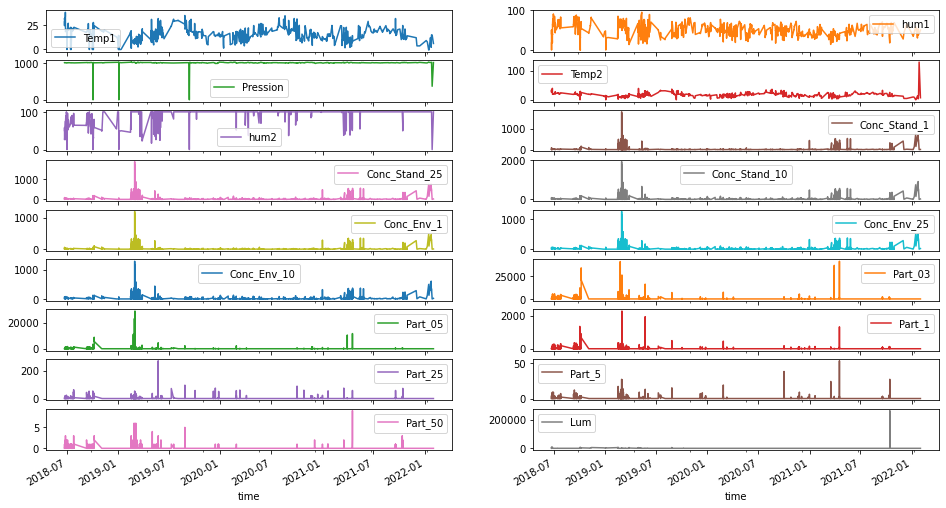

In [18]:
data.drop(columns=['id']).plot(x='time', subplots=True, figsize=(16,10), layout=(10, 2));


## Objective
This activity is an evaluation element of the skill 
> Evaluate the statistical bias to present the cost/benefit tradeoff of Data Cleaning

Your general goal is to present the importance of the cleaning process to the validity of a data analysis. 


## Instructions
You should produce a report in the form of a Jupyter notebook. A good report must include explanations backing up the analysis and argument for the importance of the cleaning procedure in producing a proper correlation analysis. 

Initially, you will focus on the variable `Pression`. Show that it's lack of correlation with the temperature and humidity sensors is wrongly deduced because of the presence of outliers. 

1. Pick a simple but suitable method to remove these outliers (try winsorizing or cliping and replacing with na).
1. Try different methods of filling the NA values left by outlier removal (backfill, interpolate, etc.)
1. Collect all different versions fo the `Pression` series in a new dataframe to facilitate some comparisons:
    1. Plot each pressure timeseries and compare the lines.
    1. Compare descriptive statistics of the pression series before and after each cleaning step.
    1. Compare histograms of the different versions of the `Pression` series
    1. Compare correlations using the original series and using the different versions of the clean series.

You may then pursue your analysis by cleaning other variables in order to obtain a more meaningful correlation analysis. To limit the duration of this activity, you may restrain your analysis to the variables involving pressure, temperature and humidity. 


## Suggested plots
Assuming the different versions of the `Pression` series were collected in a new dataframe `pression`. To this dataframe, the `time` variable was also added (copied from the original dataframe).

In [19]:
pression = pd.DataFrame({
    'time': data.time,
    'original': data.Pression,
    'method1': np.random.randn(data.Pression.shape[0]),
    'method2': np.random.randn(data.Pression.shape[0]),
    'method3': np.random.randn(data.Pression.shape[0]),
    'method4': np.random.randn(data.Pression.shape[0]),
    })

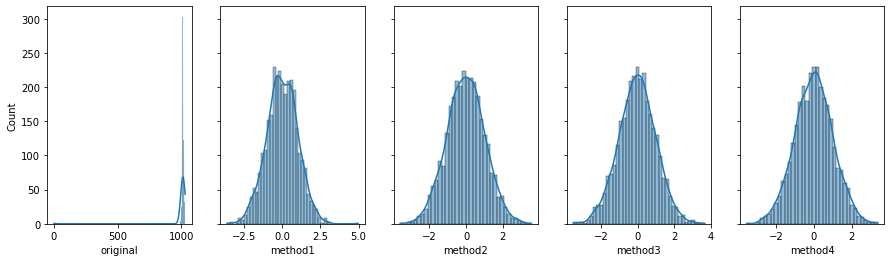

In [20]:
# Histograms
fig, axs = plt.subplots(1, pression.shape[1]-1, figsize=(15,4), sharey=True)
for i, col in enumerate(pression.drop('time',axis=1)):
        sns.histplot(pression, x=col, ax=axs[i], kde=True)


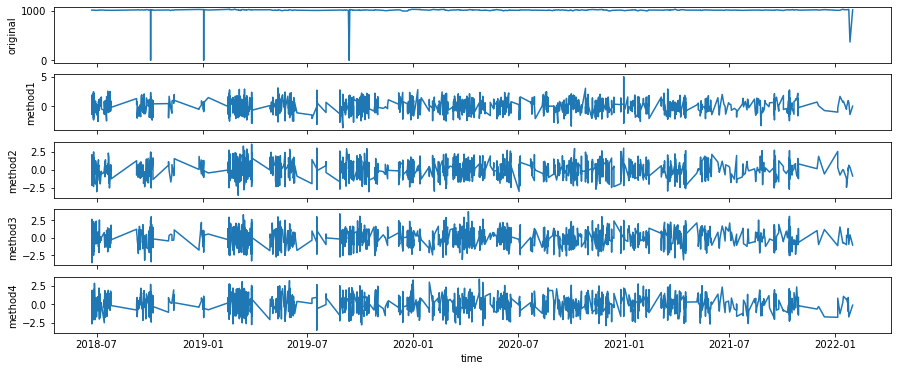

In [21]:
# Time series
fig, axs = plt.subplots(pression.shape[1]-1, 1, figsize=(15,6), sharex=True)
for i, col in enumerate(pression.drop('time',axis=1)):
        sns.lineplot(data=pression, x='time', y=col, ax=axs[i])


In [ ]:
# Nice paccakge allowing to visualize patterns of missing data
# https://github.com/ResidentMario/missingno
# !pip install missingno
# import missingno as msno